In [316]:
import numpy as np
import matplotlib.pyplot as plt
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [331]:
data=np.loadtxt("data/Druns.txt", delimiter=' ', dtype=None)
np.shape(data)

(11, 3)

Text(0.5, 1.0, 'Scatter Plot D1.txt')

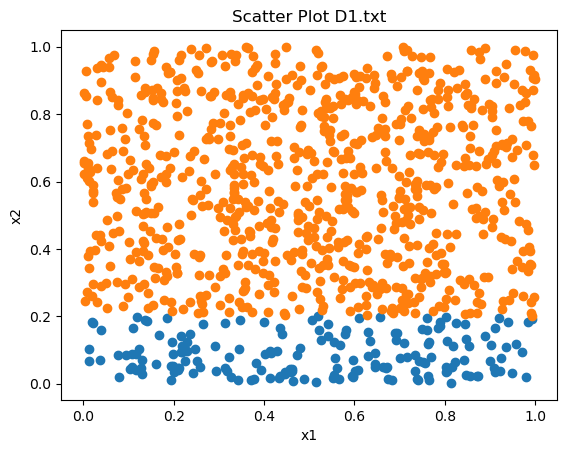

In [209]:
data_sorted_x1 = data[data[:,0].argsort()]
data_sorted_x1[990:1000]
data_sorted_y = data[data[:,2].argsort()]
y1_indx_start = np.argmax(data_sorted_y[:,2])
plt.scatter(data_sorted_y[:y1_indx_start,0],data_sorted_y[:y1_indx_start,1])
plt.scatter(data_sorted_y[y1_indx_start:,0],data_sorted_y[y1_indx_start:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot D1.txt')

In [5]:
data_sorted_x2 = data[data[:,1].argsort()]
data_sorted_x2[160:178]

array([], shape=(0, 3), dtype=float64)

In [318]:

x1_gain_ratio = np.zeros([np.shape(data)[0],1])
x2_gain_ratio = np.zeros([np.shape(data)[0],1])
def calculate_gain_ratio(x,i,j,y):
    temp = x[i][2];
    #print("temp = ",temp)
    #H(Y)
    num_ones_y = np.sum(x[i:j+1,2])
    #print(x[i:j,2])
    #print(num_ones_y)
    prob_y = num_ones_y/(j-i+1)
    if((prob_y == 0) or (prob_y == 1)):
        entropy_y = 0;
    else:
        entropy_y = -prob_y*(np.log2(prob_y))-(1-prob_y)*(np.log2(1-prob_y))
    #print(entropy_y)
    for idx,k in enumerate(x[i:j+1]):
        if(k[2]!=temp):
            #print(k)
            #print(idx)
            temp = k[2];
            prob_s = ((idx)/(j-i+1));
            if((prob_s == 0) or (prob_s == 1)):
                entropy_s = 0;
            else:
                entropy_s = -prob_s*(np.log2(prob_s))-(1-prob_s)*(np.log2(1-prob_s))
            prob_y_s_l = 0 if(idx==0 ) else (np.sum(x[i:i+idx-1+1,2]))/(idx)
            if((prob_y_s_l == 0) or (prob_y_s_l == 1)):
                entropy_y_s_l = 0;
            else:
                entropy_y_s_l = -prob_y_s_l*(np.log2(prob_y_s_l))-(1-prob_y_s_l)*(np.log2(1-prob_y_s_l))

            #print("idx =",idx, "prob_y_s_l = ", prob_y_s_l, "entropy_y_s_l =", entropy_y_s_l)
            prob_y_s_r = (np.sum(x[i+idx:j+1,2]))/(j-i-idx+1)
            if((prob_y_s_r == 0) or (prob_y_s_r == 1)):
                entropy_y_s_r = 0;
            else:
                entropy_y_s_r = -prob_y_s_r*(np.log2(prob_y_s_r))-(1-prob_y_s_r)*(np.log2(1-prob_y_s_r))
            entropy_y_s = prob_s*entropy_y_s_l + (1-prob_s)*entropy_y_s_r
            gain_ratio = (entropy_y - entropy_y_s)/entropy_s
            y[i+idx] = gain_ratio
            #print("gain_ratio",gain_ratio)
            #updating gain ratios
            
        else:
            temp = k[2];
            y[i+idx] = 0;

        

In [5]:
calculate_gain_ratio(data_sorted_x1,0,np.shape(data_sorted_x1)[0]-1,x1_gain_ratio)
calculate_gain_ratio(data_sorted_x2,0,np.shape(data_sorted_x2)[0]-1,x2_gain_ratio)
x1_argmax_gr = np.argmax(x1_gain_ratio[0 : np.shape(data_sorted_x1)[0]])
x1_max_gr = np.amax(x1_gain_ratio[:])
x2_argmax_gr = np.argmax(x2_gain_ratio[0 : np.shape(data_sorted_x1)[0]])
x2_max_gr = np.amax(x2_gain_ratio[:])
print(x1_argmax_gr, x1_max_gr, x2_argmax_gr, x2_max_gr)
#x1_gain_ratio[991]

NameError: name 'data_sorted_x1' is not defined

In [170]:
np.shape(data_sorted_x1[2:5])
a = np.ones([5, 1])
np.sum(a[0:4])

4.0

In [319]:
#Decision Tree Node
class tree_node:
    def __init__(self, feature_indx=None, split_thresh=None, left_node=None, right_node=None, leaf_node_class=None):
        self.feature_indx = feature_indx     # split feature index
        self.split_thresh = split_thresh     # split threshold"
        self.left_node = left_node           # left tree_node object 
        self.right_node = right_node         # right tree_node object 
        self.leaf_node_class = leaf_node_class     # assigning class mark to leaf node 
        
    def is_leaf_node(self):
        return self.leaf_node_class is not None

In [320]:
class DT:
    def __init__(self):
        self.root = None #root tree_node
        
    def y_predict(self, X, y_p):
        #return np.array([self.find_class(x, self.root) for x in X],dtype=int) #predicting for all the training set
        for i, x in enumerate(X):
            y_p[i] = self.find_class(x, self.root)
            print("y_p[",i,"] = ",y_p[i])
            #if(y_p[i] == nan):
             #   print("nan found")
              #  y_p[i] = 0;
        return y_p
    
    def y_fit(self, X,y):
         self.root = self.construct_tree_node(X, y)
    
    def find_class(self, x, node):
        print("Node value", node.leaf_node_class)
        value = 0;
        if node.is_leaf_node():
            print(x);
            value = node.leaf_node_class;
            print("Node is leaf, value =",value)
            return value;
        else:
            #print("checking1")
            if(x[node.feature_indx] >= node.split_thresh):
                if(node.left_node!=None):
                    value = self.find_class(x,node.left_node)
                    return value
                else:
                    return node.leaf_node_class
                return value
            else:
                #value = self.find_class(x,node.right_node)
                if(node.right_node!=None):
                    value = self.find_class(x,node.right_node)
                    return value
                else:
                    return node.leaf_node_class
                return value
            return value
        return value;
                
    def construct_tree_node(self,X,y):
        num_training_set, num_features = np.shape(X);
        print("node training set num = ", num_training_set,"num_ones = ", np.sum(y), "num_zeros = ", np.shape(y)[0]-np.sum(y));
        num_labels = len(np.unique(y));
        #stopping criteria : 1. node empty 2.all splits have 0 gain ratio 3. entropy of any candidate split is 0
        
        best_gain_ratio, best_feature_idx, best_thresh = self.best_split(X,y); #doing splits on all features
        print("best gain ratio = ", best_gain_ratio, "best_feature_idx =", best_feature_idx, "best_thresh =", best_thresh)
        if(best_gain_ratio <= 0):
            print("num_ones = ", np.sum(y), "num_zeros = ", np.shape(y)[0]-np.sum(y))
            return tree_node(feature_indx="L", leaf_node_class = np.argmax([np.shape(y)[0]-np.sum(y),np.sum(y)]), split_thresh=np.argmax([np.shape(y)[0]-np.sum(y),np.sum(y)]));
        left_tree_idxs, right_tree_idxs = self.split_set(X[:,best_feature_idx],best_thresh);
        #print("left : ",left_tree_idxs, "right :", right_tree_idxs, np.shape(left_tree_idxs)[0]);
        #print("left tree :",X[left_tree_idxs, :])
        #print("right tree :",X[right_tree_idxs, :])
        if(left_tree_idxs.any() or (np.shape(left_tree_idxs)[0])):
            print("left not empty")
            left = self.construct_tree_node(X[left_tree_idxs, :], y[left_tree_idxs])
        else:
            left = None;
        if(right_tree_idxs.any()):
            print("right not empty")
            right = self.construct_tree_node(X[right_tree_idxs, :], y[right_tree_idxs])
        else:
            right = None;
        return tree_node(best_feature_idx, best_thresh, left, right)
        
    def best_split(self, X, y):
        num_training_set, num_features = np.shape(X);
        best_gain_ratio = -1;
        split_idx, split_thresh = None, None
        x_gain_ratio = np.zeros(np.shape(X))
        x_max_gain_ratio = np.zeros([num_features,1])
        x_split_thresh = np.zeros([num_features,1])
        x_argmax_gain_ratio = np.zeros([num_features,1],dtype=int)
        #x_y_data = np.vstack(X,y).T
        x_y_data = np.vstack((X.T,y.T)).T
        #print(x_y_data)
        for idx in range(0,num_features):
            x_y_data_sorted_idx = x_y_data[x_y_data[:,idx].argsort()]
            #X_feature_column = X[:,idx];
            print("Feature Index :",idx);
            calculate_gain_ratio(x_y_data_sorted_idx,0,num_training_set-1,x_gain_ratio[:,idx])
            x_argmax_gain_ratio[idx] = np.argmax(x_gain_ratio[:,idx])
            #print("index of gain ratio",x_argmax_gain_ratio[idx])
            x_max_gain_ratio[idx] = np.amax(x_gain_ratio[:,idx])
            x_split_thresh[idx]=x_y_data_sorted_idx[x_argmax_gain_ratio[idx],idx]
            #print(np.count_nonzero(x_y_data_sorted_idx[:,idx] < x_split_thresh[idx]));
            if(np.count_nonzero(x_y_data_sorted_idx[:,idx] < x_split_thresh[idx])==0):
                x_max_gain_ratio[idx] = -1000             
                
            #print("idx = ",idx,x_y_data_sorted_idx)
        best_gain_ratio = np.amax(x_max_gain_ratio);
        split_idx = np.argmax(x_max_gain_ratio);
        #print("argmax = ", x_argmax_gain_ratio[split_idx], "best_gain_ratio =", best_gain_ratio, "index =", split_idx)
       # split_thresh = x_y_data[x_argmax_gain_ratio[split_idx],split_idx];
        split_thresh = x_split_thresh[split_idx];
        return best_gain_ratio, split_idx, split_thresh
    
    def split_set(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column >= split_thresh).flatten()
        #print("left idxs :", left_idxs)
        right_idxs = np.argwhere(X_column < split_thresh).flatten()
        #print("right idxs :", right_idxs)
        return left_idxs, right_idxs
        
    
        
                

In [321]:
d = DT();

In [332]:
d.y_fit(data[:,0:2], data[:,2]) # 0:2 iterates on only 0, 1, 2

node training set num =  11 num_ones =  3.0 num_zeros =  8.0
Feature Index : 0
Feature Index : 1
best gain ratio =  0.4301569161309807 best_feature_idx = 1 best_thresh = [8.]
left not empty
node training set num =  1 num_ones =  1.0 num_zeros =  0.0
Feature Index : 0
Feature Index : 1
best gain ratio =  -1000.0 best_feature_idx = 0 best_thresh = [0.]
num_ones =  1.0 num_zeros =  0.0
right not empty
node training set num =  10 num_ones =  2.0 num_zeros =  8.0
Feature Index : 0
Feature Index : 1
best gain ratio =  0.1206166388929235 best_feature_idx = 1 best_thresh = [0.]
left not empty
node training set num =  8 num_ones =  1.0 num_zeros =  7.0
Feature Index : 0
Feature Index : 1
best gain ratio =  0.36185425731195636 best_feature_idx = 1 best_thresh = [6.]
left not empty
node training set num =  2 num_ones =  1.0 num_zeros =  1.0
Feature Index : 0
Feature Index : 1
best gain ratio =  1.0 best_feature_idx = 1 best_thresh = [7.]
left not empty
node training set num =  1 num_ones =  0.0 n

In [333]:
y_p = np.zeros(np.shape(data)[0])
d.y_predict(data[:,0:2],y_p)
y_p

Node value None
Node value None
Node value None
Node value 0
[ 0.1 -2. ]
Node is leaf, value = 0
y_p[ 0 ] =  0.0
Node value None
Node value None
Node value None
Node value 1
[ 0. -1.]
Node is leaf, value = 1
y_p[ 1 ] =  1.0
Node value None
Node value None
Node value None
Node value 0
[0. 0.]
Node is leaf, value = 0
y_p[ 2 ] =  0.0
Node value None
Node value None
Node value None
Node value 0
[0. 1.]
Node is leaf, value = 0
y_p[ 3 ] =  0.0
Node value None
Node value None
Node value None
Node value 0
[0. 2.]
Node is leaf, value = 0
y_p[ 4 ] =  0.0
Node value None
Node value None
Node value None
Node value 0
[0. 3.]
Node is leaf, value = 0
y_p[ 5 ] =  0.0
Node value None
Node value None
Node value None
Node value 0
[0. 4.]
Node is leaf, value = 0
y_p[ 6 ] =  0.0
Node value None
Node value None
Node value None
Node value 0
[0. 5.]
Node is leaf, value = 0
y_p[ 7 ] =  0.0
Node value None
Node value None
Node value None
Node value None
y_p[ 8 ] =  nan
Node value None
Node value None
Node value

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., nan,  0.,  1.])

In [83]:
a = np.zeros([1])

In [91]:
np.shape(a)[0]

1

In [122]:
data=np.loadtxt("data/Problem2.txt", delimiter=' ', dtype=None)


Text(0.5, 1.0, 'Scatter Plot')

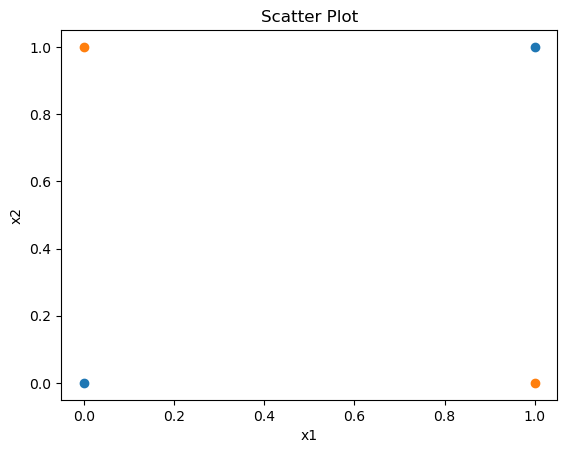

In [135]:
plt.scatter([0,1],[0,1])

plt.scatter([0,1],[1,0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')

In [190]:
def print2DUtil(root, space):
    # Base case  
    if (root == None):
        return    # Increase distance between levels  
    COUNT = [8]
    space += COUNT[0]
    # Process right child first    
    print2DUtil(root.right_node, space)
    # Print current node after space    # count    print()
    for i in range(COUNT[0], space):
        print(end=" ")
    print("-> ", root.feature_indx, root.split_thresh)
    # Process left child    
    print2DUtil(root.left_node, space)
# Wrapper over print2DUtil()
def print2D(root):
    # space=[0]    # Pass initial space count as 0    
    print2DUtil(root, 0)


In [286]:
print2D(d.root)

                ->  L 1
        ->  1 [-0.954911]
                        ->  L 0
                ->  1 [-0.954629]
                        ->  L 1
->  1 [-0.926187]
                        ->  L 1
                ->  0 [-1.138432]
                                                ->  L 0
                                        ->  1 [-0.925588]
                                                                                ->  L 1
                                                                        ->  0 [-0.314949]
                                                                                ->  0 [-0.312904]
                                                                                        ->  L 1
                                                                ->  1 [-0.712842]
                                                                                ->  L 1
                                                                        ->  0 [-0.330695]
                      

In [210]:
Notation : 
    Non Leaf Node : Feature_index_x1_or_x2 [split_thresh]
        Leaf Node : Label_0_or_1    

SyntaxError: invalid syntax (1989053489.py, line 1)

In [235]:
x1_test = np.random.uniform(0,1,1000);
x2_test = np.random.uniform(0,1,1000);
yp_test = np.zeros([1000,1])
x_data = np.vstack((x1_test.T,x2_test.T)).T

d.y_predict(x_data,yp_test)

[0.54753112 0.21215665]
Node is leaf, value = 0
[0.]
[0.30021617 0.02777551]
Node is leaf, value = 0
[0.]
[0.4280168  0.33590844]
Node is leaf, value = 0
[0.]
[0.6803084  0.63411204]
Node is leaf, value = 1
[1.]
[0.03586411 0.34462535]
Node is leaf, value = 0
[0.]
[0.04024165 0.67958944]
Node is leaf, value = 0
[0.]
[0.90832878 0.58067201]
Node is leaf, value = 1
[1.]
[0.3724354  0.17610967]
Node is leaf, value = 0
[0.]
[0.10363677 0.92902659]
Node is leaf, value = 0
[0.]
[0.23182453 0.46373116]
Node is leaf, value = 0
[0.]
[0.57644284 0.37650875]
Node is leaf, value = 0
[0.]
[0.42433071 0.65457133]
Node is leaf, value = 0
[0.]
[0.811517   0.91318541]
Node is leaf, value = 1
[1.]
[0.15876516 0.81971294]
Node is leaf, value = 0
[0.]
[0.980154  0.2227467]
Node is leaf, value = 1
[1.]
[0.460648   0.34448091]
Node is leaf, value = 0
[0.]
[0.63538517 0.25535073]
Node is leaf, value = 0
[0.]
[0.08121731 0.48366618]
Node is leaf, value = 0
[0.]
[0.39999636 0.60580414]
Node is leaf, value = 0


array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

In [236]:
x_y_test_data = np.vstack((x_data.T,yp_test.T)).T


Text(0.5, 1.0, 'Scatter Plot D1 Test Data')

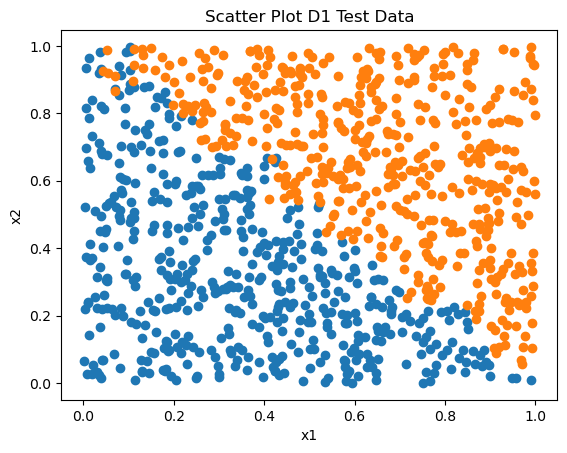

In [237]:
data_sorted_y = x_y_test_data[x_y_test_data[:,2].argsort()]
y1_indx_start = np.argmax(data_sorted_y[:,2])
plt.scatter(data_sorted_y[:y1_indx_start,0],data_sorted_y[:y1_indx_start,1])
plt.scatter(data_sorted_y[y1_indx_start:,0],data_sorted_y[y1_indx_start:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot D1 Test Data')

In [287]:
data_shuffled = np.random.permutation(data)

In [288]:
data_shuffled

array([[-0.234924,  1.182241,  1.      ],
       [ 0.414342,  0.748024,  0.      ],
       [-0.775488,  0.870783,  0.      ],
       ...,
       [-1.036033,  1.465173,  1.      ],
       [-1.292001, -0.26574 ,  1.      ],
       [ 0.502344, -1.201416,  1.      ]])

In [289]:
data

array([[-1.499372,  0.976384,  1.      ],
       [-1.499224, -0.517983,  1.      ],
       [-1.49888 , -1.271624,  1.      ],
       ...,
       [ 1.499284,  0.447541,  1.      ],
       [ 1.499313,  1.092598,  1.      ],
       [ 1.499767,  0.661564,  1.      ]])

In [290]:
np.shape(data_shuffled)

(10000, 3)

In [311]:
d.y_fit(data_shuffled[:32,0:2], data_shuffled[:32,2])

node training set num =  32 num_ones =  20.0 num_zeros =  12.0
Feature Index : 0
Feature Index : 1
best gain ratio =  0.22970164285397437 best_feature_idx = 1 best_thresh = [1.062679]
left not empty
node training set num =  7 num_ones =  7.0 num_zeros =  0.0
Feature Index : 0
Feature Index : 1
best gain ratio =  -1000.0 best_feature_idx = 0 best_thresh = [-1.371434]
num_ones =  7.0 num_zeros =  0.0
right not empty
node training set num =  25 num_ones =  13.0 num_zeros =  12.0
Feature Index : 0
Feature Index : 1
best gain ratio =  0.3897518000309146 best_feature_idx = 1 best_thresh = [-0.369774]
left not empty
node training set num =  14 num_ones =  3.0 num_zeros =  11.0
Feature Index : 0
Feature Index : 1
best gain ratio =  0.6674214433230314 best_feature_idx = 0 best_thresh = [-0.775488]
left not empty
node training set num =  12 num_ones =  1.0 num_zeros =  11.0
Feature Index : 0
Feature Index : 1
best gain ratio =  0.3802179361909291 best_feature_idx = 0 best_thresh = [0.927203]
lef

In [312]:
yp_test = np.zeros([10000,1])
#x_data = np.vstack((x1_test.T,x2_test.T)).T

d.y_predict(data_shuffled[8192
                          :,0:2],yp_test[8192:,:])

Node value None
Node value None
Node value None
Node value None
Node value 1
[-1.422796 -1.260125]
Node is leaf, value = 1
y_p[ 0 ] =  [1.]
Node value None
Node value 1
[0.60517  1.219751]
Node is leaf, value = 1
y_p[ 1 ] =  [1.]
Node value None
Node value None
Node value None
Node value None
Node value 0
[ 0.207722 -0.311343]
Node is leaf, value = 0
y_p[ 2 ] =  [0.]
Node value None
Node value None
Node value None
Node value None
Node value None
Node value 0
[ 1.138735 -0.309778]
Node is leaf, value = 0
y_p[ 3 ] =  [0.]
Node value None
Node value None
Node value None
Node value 1
[-0.351335 -0.483296]
Node is leaf, value = 1
y_p[ 4 ] =  [1.]
Node value None
Node value 1
[0.988114 1.133716]
Node is leaf, value = 1
y_p[ 5 ] =  [1.]
Node value None
Node value None
Node value None
Node value None
Node value None
Node value 0
[1.398244 0.436215]
Node is leaf, value = 0
y_p[ 6 ] =  [0.]
Node value None
Node value None
Node value None
Node value 1
[ 0.236585 -0.559539]
Node is leaf, value = 1

y_p[ 1270 ] =  [1.]
Node value None
Node value None
Node value None
Node value None
Node value None
y_p[ 1271 ] =  [nan]
Node value None
Node value None
Node value None
Node value None
Node value 0
[-0.27856   0.725761]
Node is leaf, value = 0
y_p[ 1272 ] =  [0.]
Node value None
Node value 1
[0.21824  1.083808]
Node is leaf, value = 1
y_p[ 1273 ] =  [1.]
Node value None
Node value None
Node value None
Node value None
Node value 1
[-0.904265 -1.325474]
Node is leaf, value = 1
y_p[ 1274 ] =  [1.]
Node value None
Node value None
Node value None
Node value None
Node value 1
[ 0.136944 -0.856344]
Node is leaf, value = 1
y_p[ 1275 ] =  [1.]
Node value None
Node value None
Node value None
Node value None
Node value 1
[-0.657544 -0.882694]
Node is leaf, value = 1
y_p[ 1276 ] =  [1.]
Node value None
Node value 1
[0.526083 1.437161]
Node is leaf, value = 1
y_p[ 1277 ] =  [1.]
Node value None
Node value None
Node value None
Node value None
Node value 0
[0.69507  0.877258]
Node is leaf, value = 0


array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [251]:
data_shuffled[8192:8195]

array([[-0.823327, -0.143797,  0.      ],
       [-1.396874, -1.424   ,  1.      ],
       [ 0.120275,  0.824578,  0.      ]])

In [275]:
print(yp_test[9900:])

[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [nan]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [nan]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]


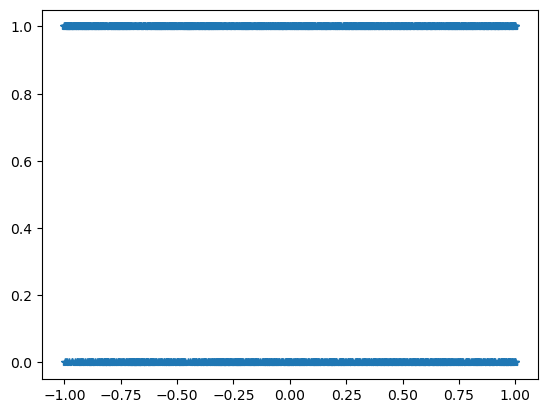

In [314]:
np.amax(yp_test[8192:,:])

nan

In [296]:
np.sum((np.square(data_shuffled[8192:,2] - yp_test[8192:,:])))

nan

In [295]:
mse

array([nan, nan, nan, ..., nan, nan, nan])